In [2]:
# !pip install photutils
# !pip3 install numpngw

In [3]:
import sunpy
import sunpy.map
import matplotlib.colors as colors
from astropy import *
import astropy.units as u
import pathlib
import json, urllib, numpy as np, matplotlib.pylab as plt, matplotlib.ticker as mtick, requests
import sunpy.map
import drms
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.cm import color_tables as ct
import sunpy.coordinates
from datetime import datetime as dt_obj
import matplotlib.dates as mdates
import matplotlib.colors as mcol
import matplotlib.patches as ptc
from matplotlib.dates import *
import math

import drms
c = drms.Client()

import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [5]:
import cv2
from PIL import Image

# create AIA png

In [6]:
# aia30401 = fits.open('AIA0304/aia_lev1_304a_2012_01_01t00_00_08_14z_image_lev1.fits')
aia_map = sunpy.map.Map('AIA0304/aia_lev1_304a_2012_01_01t00_00_08_14z_image_lev1.fits')

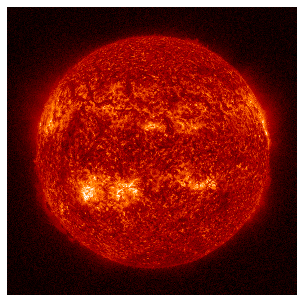

In [7]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = aia_map.plot(axes=axes, annotate=False, clip_interval=(1, 99.99)*u.percent)

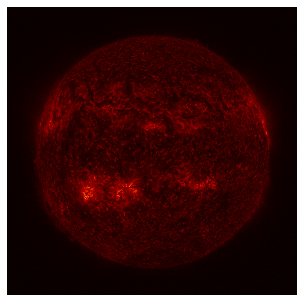

In [8]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = aia_map.plot(axes=axes, annotate=False)

In [9]:
type(im)

matplotlib.image.AxesImage

In [10]:
im.write_png('aia0304_01.png')

# aia hmi alignment

In [11]:
import matplotlib.pyplot as plt
from reproject import reproject_interp

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [12]:
sorted(os.listdir('HMI/'))[0]

'hmi_m_45s_2012_01_01_00_01_30_tai_magnetogram.fits'

In [13]:
hmi_map = sunpy.map.Map('HMI/hmi_m_45s_2012_01_01_00_01_30_tai_magnetogram.fits')

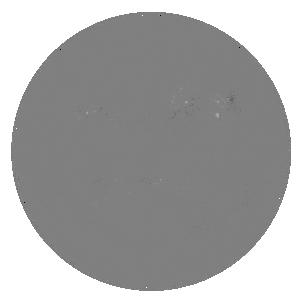

In [14]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = hmi_map.plot(axes=axes, annotate=False)

In [15]:
hmi_map.plot_settings['cmap'] = "hmimag"
hmi_map.plot_settings['norm'] = plt.Normalize(-2000, 2000)

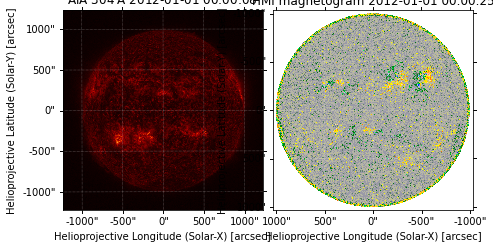

In [16]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, projection=aia_map)
aia_map.plot(axes=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=hmi_map)
hmi_map.plot(axes=ax2)

fig.tight_layout()

In [17]:
output, footprint = reproject_interp(hmi_map, aia_map.wcs, aia_map.data.shape)

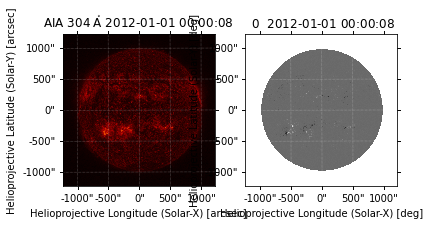

In [18]:
out_hmi = sunpy.map.Map(output, aia_map.wcs)
# out_hmi.plot_settings['cmap'] = "hmimag"
# out_hmi.plot_settings['norm'] = plt.Normalize(-1500, 1500)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=aia_map)
aia_map.plot(axes=ax1)
ax2 = fig.add_subplot(1, 2, 2, projection=out_hmi)
out_hmi.plot(axes=ax2)

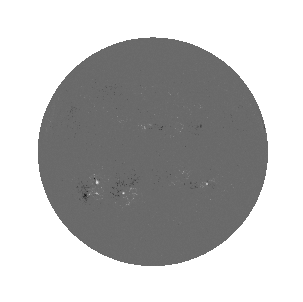

In [19]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
img = out_hmi.plot(axes=axes, annotate=False)

In [20]:
img.write_png('hmi_01.png')

# using cv2/PIL to apply mask|

In [21]:
# hmi_png = Image.open('hmi_01.png')

In [22]:
# im = cv2.imread('hmi_01.png')
# height,width,depth = im.shape
# circle_img = np.zeros((height,width), np.uint8)
# cv2.circle(circle_img,(width/2,height/2),280,1,thickness=-1)

# masked_data = cv2.bitwise_and(im, im, mask=circle_img)

# cv2.imshow("masked", masked_data)
# cv2.waitKey(0)

In [70]:
im = cv2.imread('hmi_01.png')

In [71]:
height,width,depth = im.shape

In [72]:
circle_img = np.zeros((height,width), np.uint8)

In [73]:
cv2.circle(circle_img,(int(width/2),int(height/2)),4000,1,thickness=-1)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [74]:
masked_data = cv2.bitwise_and(im, im, mask=circle_img)

In [75]:
# cv2.imwrite('masked',masked_data)

In [76]:
from PIL import Image
im = Image.fromarray(masked_data)
im.save("masked.png")